In [0]:
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
G = nx.read_gpickle('spotify_data.pickle')

In [0]:
F = nx.read_gpickle('spotify_data.pickle')

In [0]:
genres_ = ['house', 'pop', 'hip hop', 'rap', 'classical', 'rock', 'tech', 'indie', 'metal', 'edm', 'step', 'jazz']
temp_set = set()
remove_nodes = set()

for node in G.nodes(data = True):
    try:
        if len(node[1]['genres']) > 0 and G.degree(node[0]) > 1:
            for c in genres_:
                for d in node[1]['genres']:
                    if c in d:
                        temp_set.add(c)
        else:
            remove_nodes.add(node[0])
        
        if len(temp_set) == 0:
            remove_nodes.add(node[0])
                
        node[1]['genres'] = list(temp_set)
        temp_set = set()

    except:
        remove_nodes.add(node[0])

In [0]:
for r in remove_nodes:
    G.remove_node(r)

In [0]:
def plt_sorted(nx_list, number = 20, title = 'Title', hue = 'blue'):
    names = []
    values = []
    for g in nx_list[:number]:
        names.append(F.nodes[g[0]]['name'])
        values.append(float(g[1]))
        
    plt.bar(names, height = values, color = hue)
    plt.xticks(rotation='vertical')
    plt.title(title)
    return plt.show()  

In [0]:
G_degree = nx.degree_centrality(G)
G_degree_sorted = sorted(G_degree.items(), key=lambda x:x[1], reverse = True) 

In [0]:
G_closeness = nx.closeness_centrality(G)
G_closeness_sorted = sorted(G_closeness.items(), key=lambda x:x[1], reverse = True) 

In [0]:
G_betweennes = nx.betweenness_centrality(G)
G_betweennes_sorted = sorted(G_betweennes.items(), key=lambda x:x[1], reverse = True) 

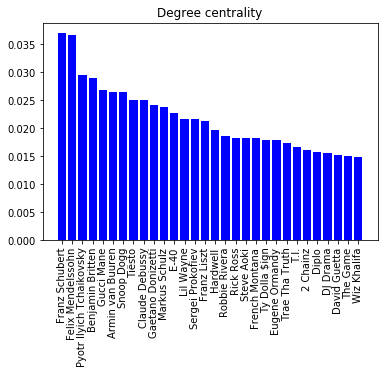

In [10]:
plt_sorted(G_degree_sorted, 30, 'Degree centrality')

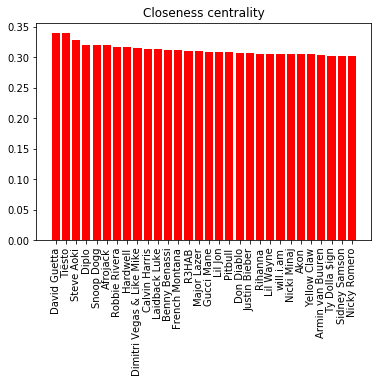

In [11]:
plt_sorted(G_closeness_sorted, 30, 'Closeness centrality', 'red')

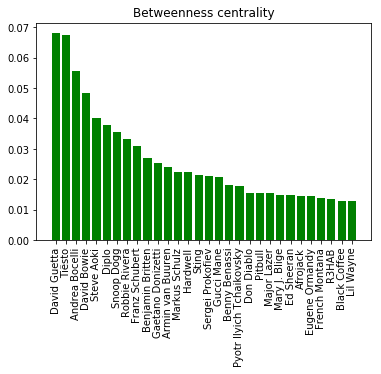

In [18]:
plt_sorted(G_betweennes_sorted, 30, 'Betweenness centrality', 'green')

Full graph

In [0]:
# F_degree = nx.degree_centrality(F)
# F_degree_sorted = sorted(F_degree.items(), key=lambda x:x[1], reverse = True) 

In [0]:
# F_closeness = nx.closeness_centrality(F)
# F_closeness_sorted = sorted(F_closeness.items(), key=lambda x:x[1], reverse = True) 

In [0]:
# F_betweennes = nx.betweenness_centrality(F)
# F_betweennes_sorted = sorted(F_betweennes.items(), key=lambda x:x[1], reverse = True) 